# Libraries

In [2]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from PIL import Image

# Mean shift

Number of segments:  19


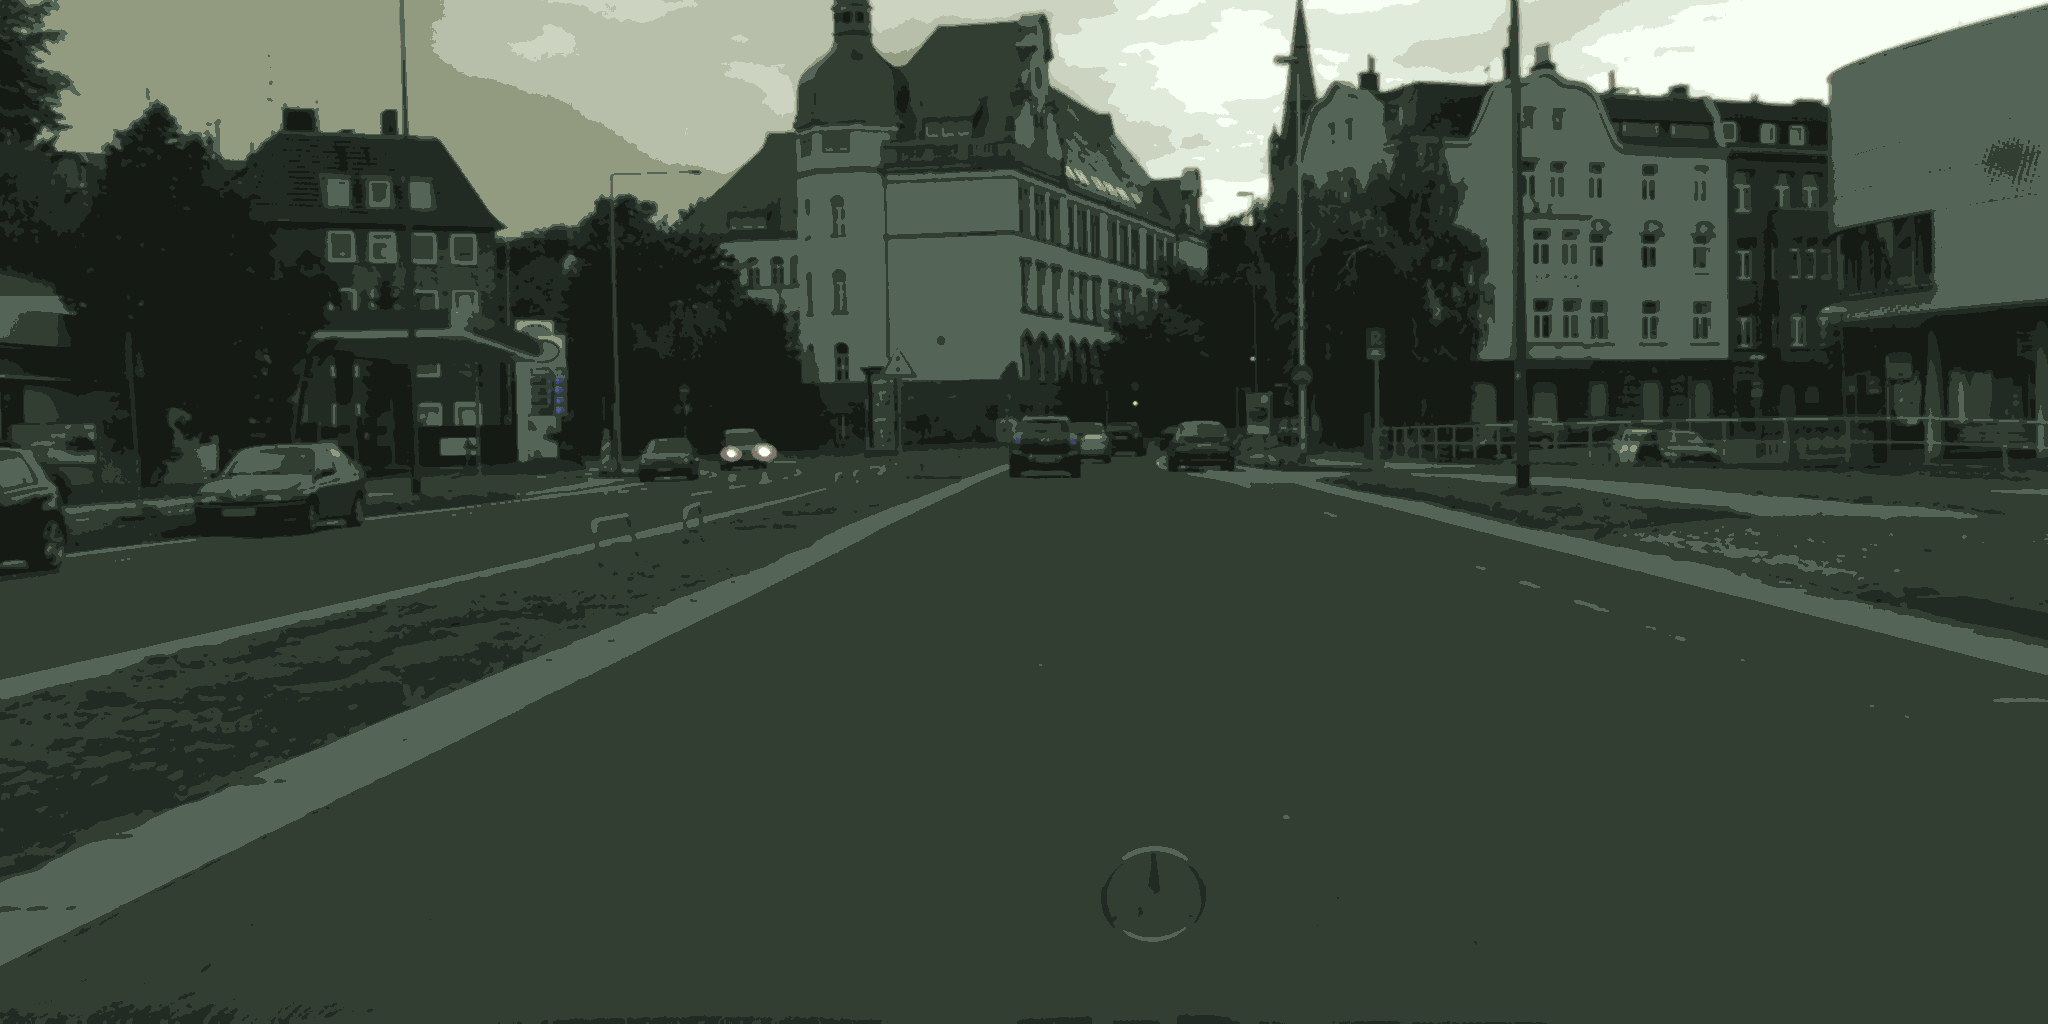

In [3]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth

img = cv.imread("aachen_000001_000019_leftImg8bit.png")

# filter to reduce noise
img = cv.medianBlur(img, 3)

# flatten the image
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

# meanshift
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth, max_iter=800, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_

# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

# get the average color of each segment
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))

# show the result
cv.imwrite('./output/result_ms_1.png', result)
Image.fromarray(result)

# k-means

In [5]:
image = cv.imread("aachen_000001_000019_leftImg8bit.png")
# convert to RGB
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
for k in [2, 3, 5, 8]:
    _, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_PP_CENTERS)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    #save the image
    cv.imwrite(f'./output/result_kmeans_{k}.png',segmented_image)
    Image.fromarray(segmented_image)

In [7]:
img = cv.imread("aachen_000001_000019_gtFine_labelIds.png")
print(np.unique(img))

[ 0  1  3  4  5  6  7  8 11 12 13 17 19 20 21 22 23 26]
